# Load Packages 

In [1]:
import os

from google.oauth2 import service_account

from google.api_core.protobuf_helpers import get_messages


from google.cloud import storage


import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import google.cloud
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

# Load CSV file from Google Cloud Storage

In [8]:
credentials = service_account.Credentials.from_service_account_file("C://Users//your_google_credential_json_filename.json")
#substitute with your Google service credentials json file path

In [9]:
client = storage.Client(project="your_project_name",credentials=credentials)
#substitute with your project name

In [10]:
from io import BytesIO

In [11]:
bucket = client.get_bucket('your_bucket_name')
#substitute with our bucket name
twcs = bucket.blob('twcs.csv')

In [12]:
content = twcs.download_as_string()

In [13]:
content = pd.read_csv(BytesIO(content))

In [14]:
content.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [15]:
content_customer = content.loc[content['inbound'] == True]

Since the content text quota is 1000,000 bytes in Google Cloud Platform NLP, we reduce the customer review size. 
Reference: https://cloud.google.com/natural-language/quotas

In [16]:
content_customer = content_customer.iloc[0:5000,:]
content_customer.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0


# Check file size 

In [17]:
#function to check the size of a string
def utf8len(s):
    return len(s.encode('utf-8'))

In [18]:
utf8len(content['text'].to_string())

173591556

In [19]:
utf8len(content_customer['text'].to_string())

294821

# Sample content Sentiment Analysis 

In [20]:
client_lan = language.LanguageServiceClient(credentials=credentials)

In [21]:
document = types.Document(content=content_customer['text'].to_string(), type=enums.Document.Type.PLAIN_TEXT)
sentiment = client_lan.analyze_sentiment(document).document_sentiment

In [22]:
score=[]
for i in content_customer['text']:
    try:
        document = types.Document(content=i, type=enums.Document.Type.PLAIN_TEXT)
        sentiment = client_lan.analyze_sentiment(document).document_sentiment
        score.append(sentiment.score)
    except Exception:
        pass

In [23]:
score

[0.10000000149011612,
 -0.699999988079071,
 0.0,
 -0.8999999761581421,
 0.10000000149011612,
 -0.10000000149011612,
 -0.5,
 -0.10000000149011612,
 -0.4000000059604645,
 -0.20000000298023224,
 -0.4000000059604645,
 -0.800000011920929,
 -0.8999999761581421,
 -0.5,
 0.0,
 0.699999988079071,
 -0.800000011920929,
 0.4000000059604645,
 -0.4000000059604645,
 -0.20000000298023224,
 -0.30000001192092896,
 0.0,
 0.0,
 0.0,
 -0.30000001192092896,
 -0.20000000298023224,
 -0.699999988079071,
 0.4000000059604645,
 -0.8999999761581421,
 -0.8999999761581421,
 0.0,
 -0.800000011920929,
 0.6000000238418579,
 -0.30000001192092896,
 -0.800000011920929,
 0.0,
 0.800000011920929,
 -0.20000000298023224,
 0.10000000149011612,
 0.0,
 0.6000000238418579,
 0.800000011920929,
 -0.800000011920929,
 0.10000000149011612,
 -0.800000011920929,
 0.0,
 0.0,
 -0.4000000059604645,
 -0.10000000149011612,
 0.5,
 0.0,
 0.20000000298023224,
 0.0,
 0.0,
 0.0,
 -0.20000000298023224,
 -0.8999999761581421,
 -0.699999988079071,
 0

In [24]:
entities = client_lan.analyze_entity_sentiment(document).entities
entities

[name: "@115940"
type: OTHER
salience: 0.6930064558982849
mentions {
  text {
    content: "@115940"
    begin_offset: -1
  }
  type: PROPER
  sentiment {
  }
}
sentiment {
}
, name: "commercials"
type: WORK_OF_ART
salience: 0.11488936096429825
mentions {
  text {
    content: "commercials"
    begin_offset: -1
  }
  type: COMMON
  sentiment {
  }
}
sentiment {
}
, name: "@864"
type: OTHER
salience: 0.1111048012971878
mentions {
  text {
    content: "@864"
    begin_offset: -1
  }
  type: PROPER
  sentiment {
  }
}
sentiment {
}
, name: "bit"
type: OTHER
salience: 0.08099936693906784
mentions {
  text {
    content: "bit"
    begin_offset: -1
  }
  type: COMMON
  sentiment {
  }
}
sentiment {
}
]

In [25]:
np.mean(score)

-0.13032767913375043

In [26]:
np.max(score)

0.8999999761581421

In [27]:
def score_sentiment(i):
    if i > 0:return 'positive'
    elif i == 0: return 'neutral'
    elif i < 0: return 'negative'

In [28]:
result = pd.Series(score).apply(score_sentiment)

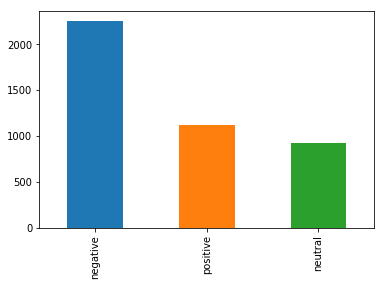

In [29]:
result.value_counts().plot.bar()

# Conclusion 

Since GCP Sentiment Analysis responses only returns the sentiment scores, we defined the sentiment score that equals to 0 as neutral sentiment, and the score that is larger than 0 as positive sentiment; on contrast, smaller than 0 as negative sentiment. Surprisingly, we got totally different result from Amazon Comprehend, most customers’ sentiments are negative, which take over 70% of the first 5000 conversations.

# Recommendation 

Since up to 70% of the first 5000 conversations from customers’ sentiment scores are below zero, which indicate negative sentiments, we need to understand the causes of their negative emotions. It is also worthwhile to conduct analysis to see if there is any improvement on customers’ sentiments as the conversation goes on with customer supports. 

Since AWS and GCP have the limit times of free API calls, the limit in our analysis is that we can only focus on the first 5000 conversations. It is also worthwhile to improve our analysis by reviewing the whole conversation dataset to see if there is any bias in the first 5000 samples.
